In [1]:
# Libraries working for arrays and dataframe
import numpy as np
import pandas as pd
# Used for Data Visualization and statistical tool
from scipy import stats
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt 

#personal files/functions
import wrangle as w

In [2]:
df=w.covid_data()

In [3]:
train,validate,test=w.split_data(df,'is_dead')

In [4]:
train.shape, validate.shape,test.shape

((629145, 20), (209715, 20), (209715, 20))

In [5]:
train.is_dead.value_counts()

0    582979
1     46166
Name: is_dead, dtype: int64

In [6]:
train.is_dead.value_counts()

0    582979
1     46166
Name: is_dead, dtype: int64

In [7]:
train.is_dead.value_counts()

0    582979
1     46166
Name: is_dead, dtype: int64

In [8]:
def create_pie_chart(df, column_name,title):
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [12]:
train_pos=train[train.covid_pos==1]

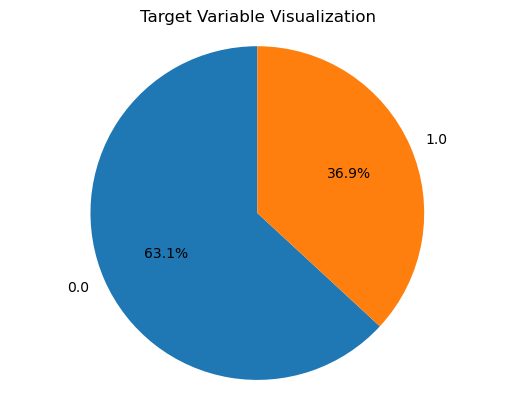

In [14]:
create_pie_chart(train,'covid_pos','Target Variable Visualization')

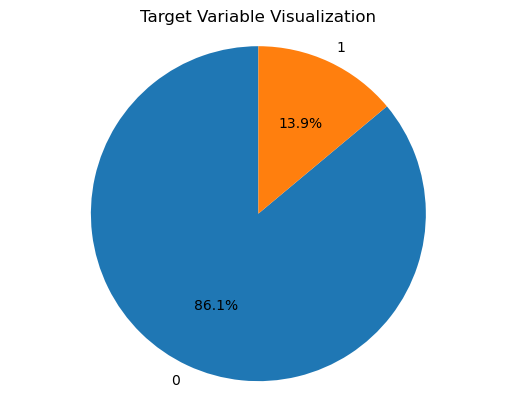

In [52]:
create_pie_chart(train_pos,'is_dead','Target Variable Visualization')

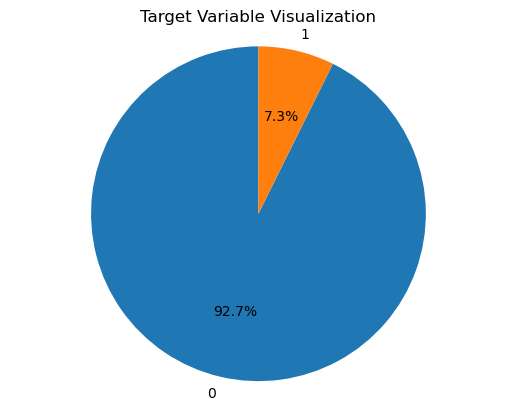

In [53]:
create_pie_chart(train,'is_dead','Target Variable Visualization')

med_level


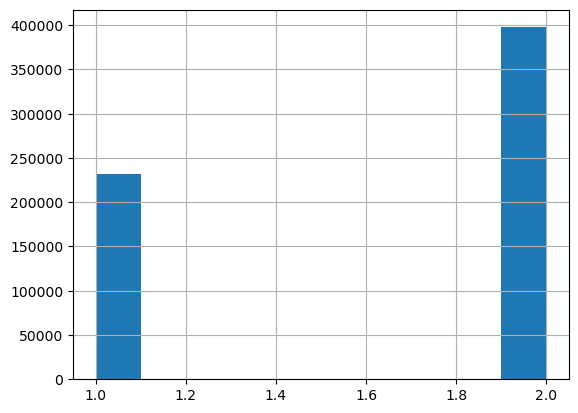

gender


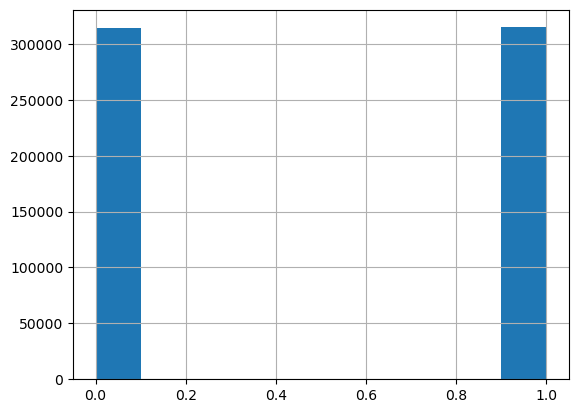

is_hospitalized


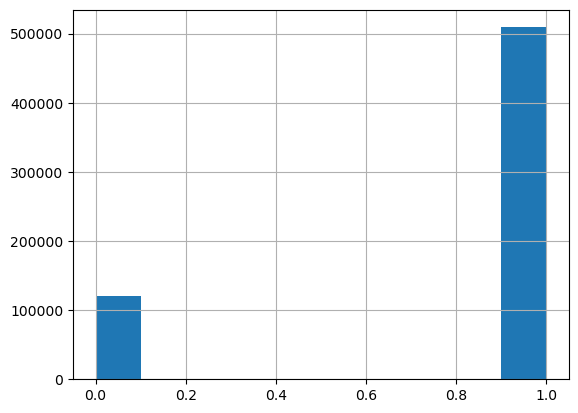

is_dead


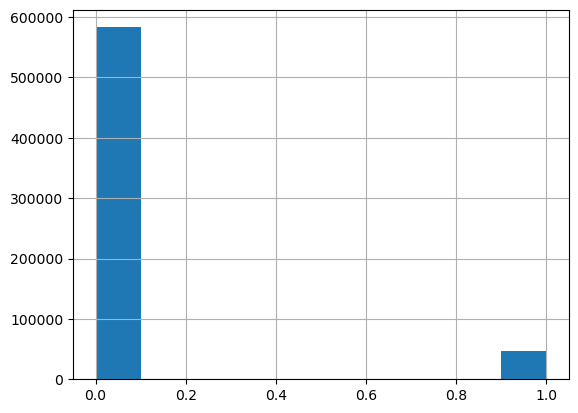

ventilator


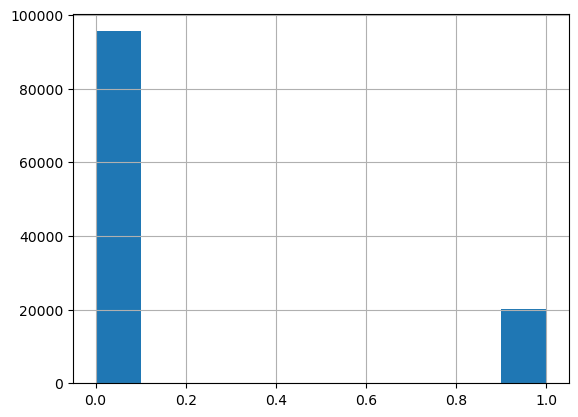

pneumonia


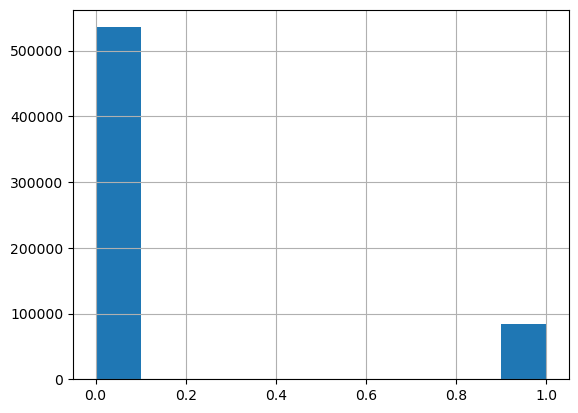

age


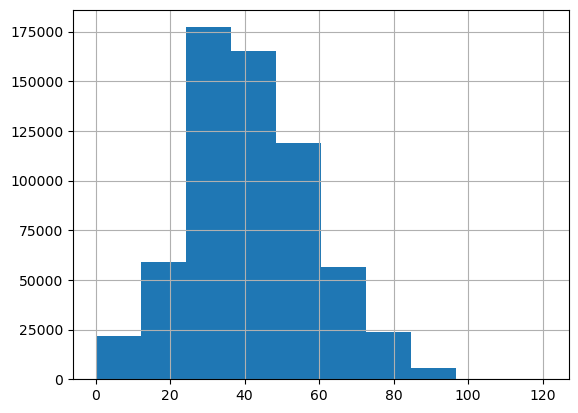

pregnant


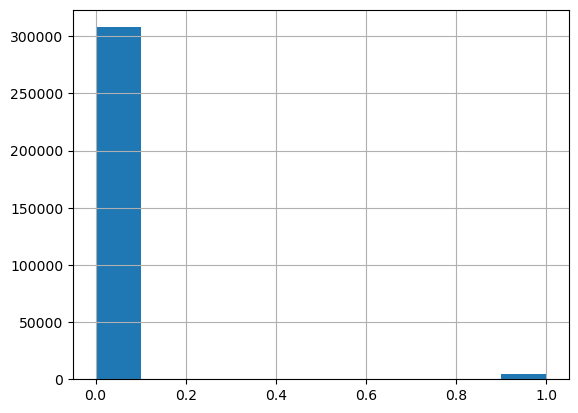

diabetes


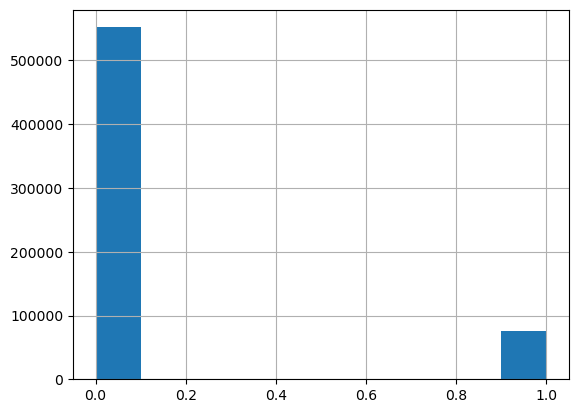

copd


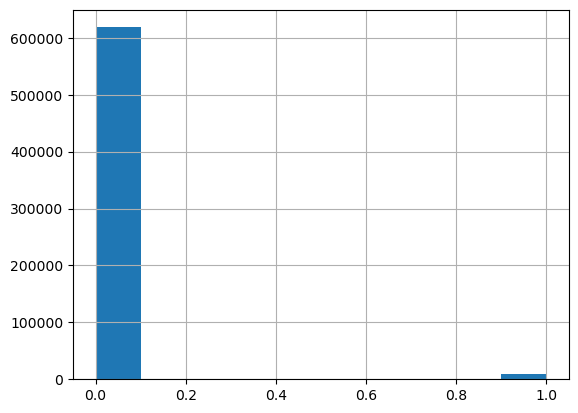

asthma


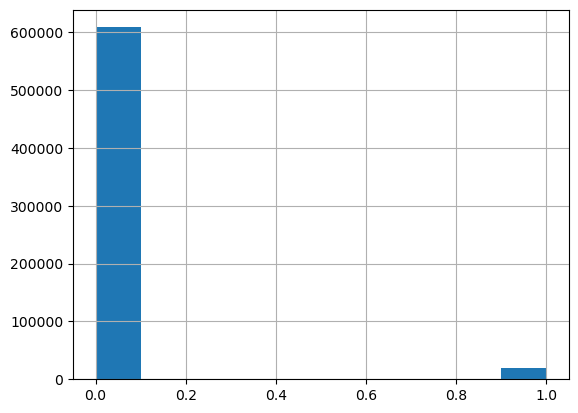

immunosup


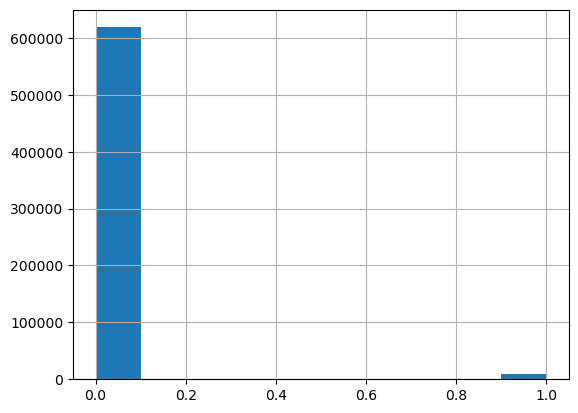

hypertension


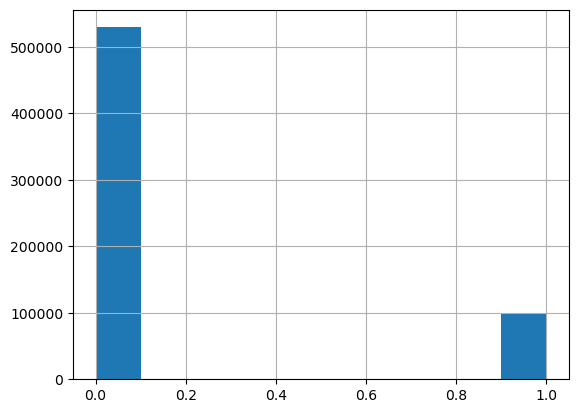

heart_problems


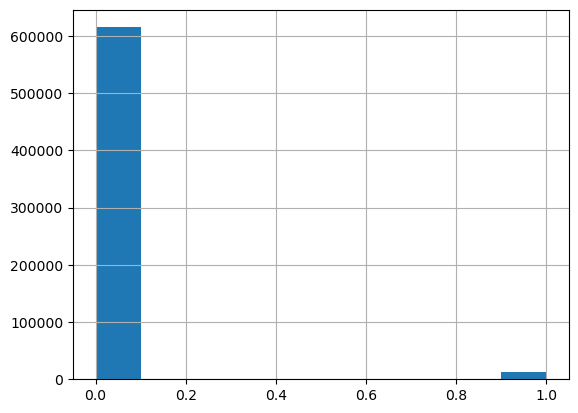

obese


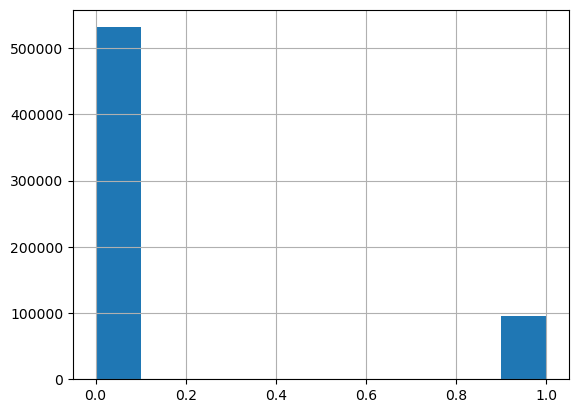

renal_disease


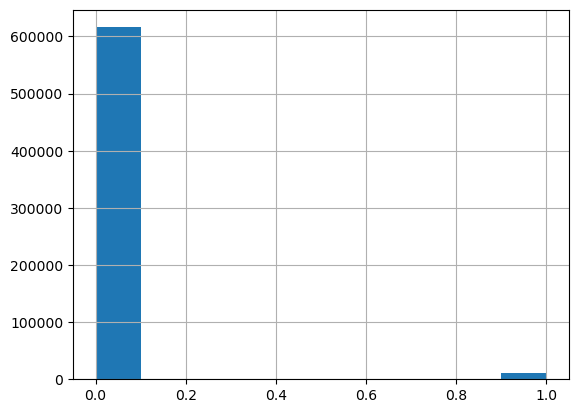

smoker


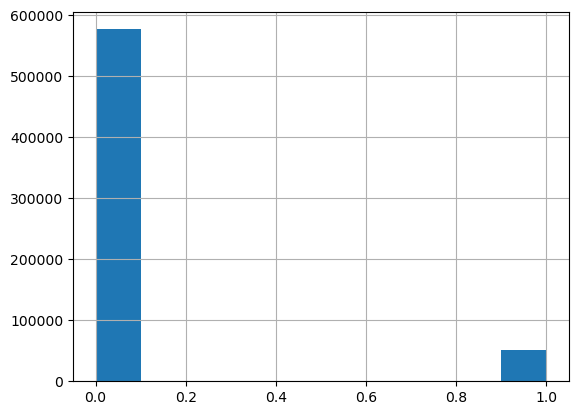

covid_pos


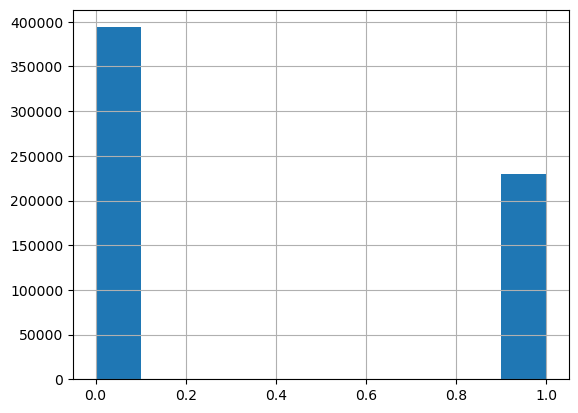

icu


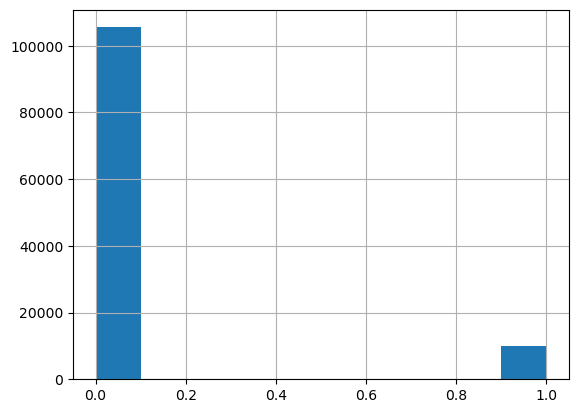

age_risk


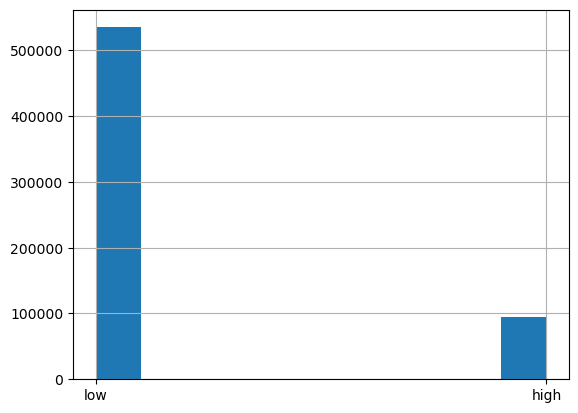

In [15]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

In [16]:
train.columns

Index(['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu', 'age_risk'],
      dtype='object')

In [19]:
target_var = 'covid_pos'
feat_vars = ['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'icu', 'age_risk']
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
    target_var = 'taxvalue'
    feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount','county']
    # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Correlation with Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()

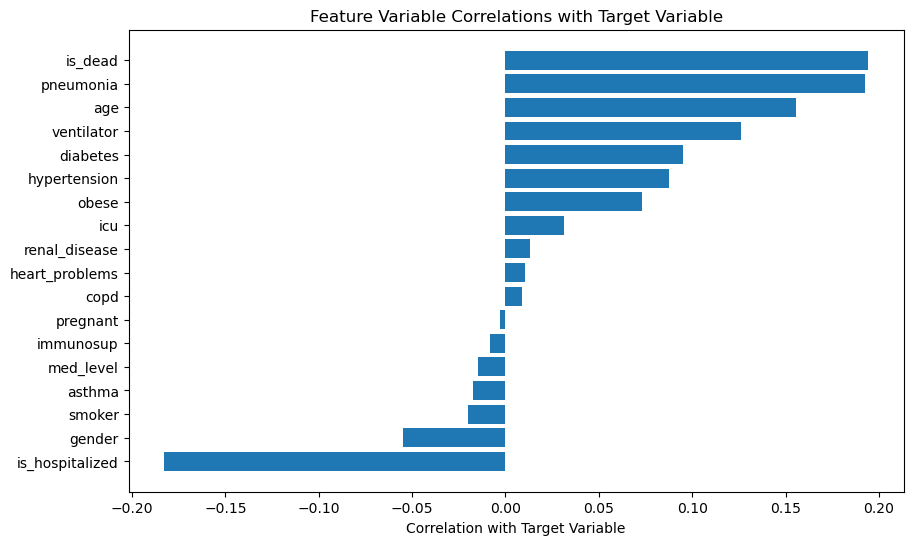

In [20]:
plot_correlations(train,target_var, feat_vars)

In [21]:
def create_barplot(data, x, y, title):
    # convert y column to numeric data type
    data[y] = pd.to_numeric(data[y])
    
    # create barplot
    sns.barplot(data=data, x=x, y=y)
    plt.title(title)
    
    # plot average line
    plt.axhline(data[y].mean(), color='red', linestyle='--', label='Average')
    plt.legend()

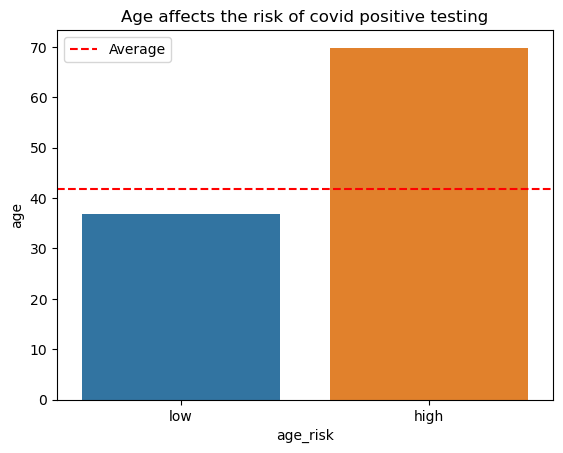

In [23]:
create_barplot(train,'age_risk','age','Age affects the risk of covid positive testing')

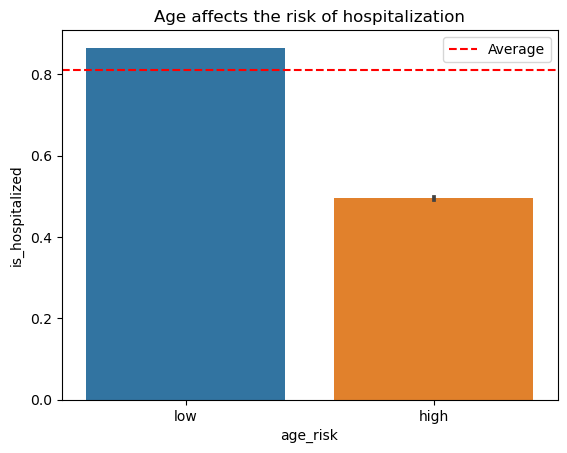

In [25]:
create_barplot(train,'age_risk','is_hospitalized','Age affects the risk of hospitalization')

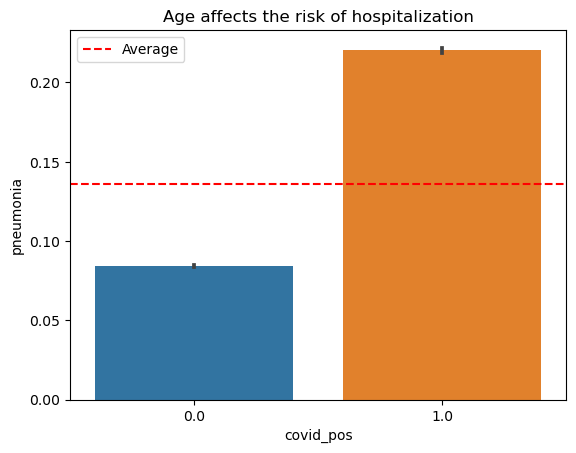

In [26]:
create_barplot(train,'covid_pos','pneumonia','Age affects the risk of hospitalization')

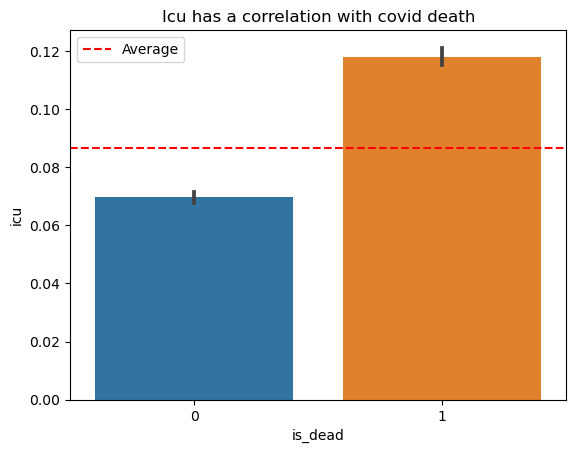

In [27]:
create_barplot(train,'is_dead','icu','Icu has a correlation with covid death')

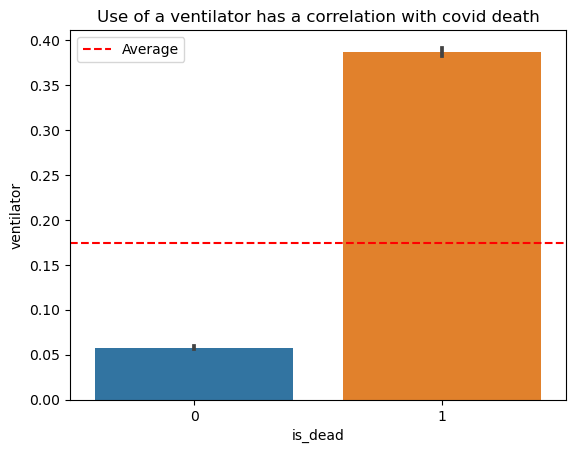

In [28]:
create_barplot(train,'is_dead','ventilator','Use of a ventilator has a correlation with covid death')

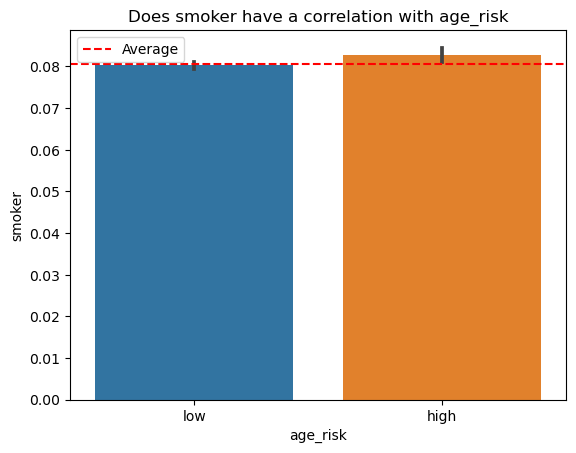

In [29]:
create_barplot(train,'age_risk','smoker','Does smoker have a correlation with age_risk')

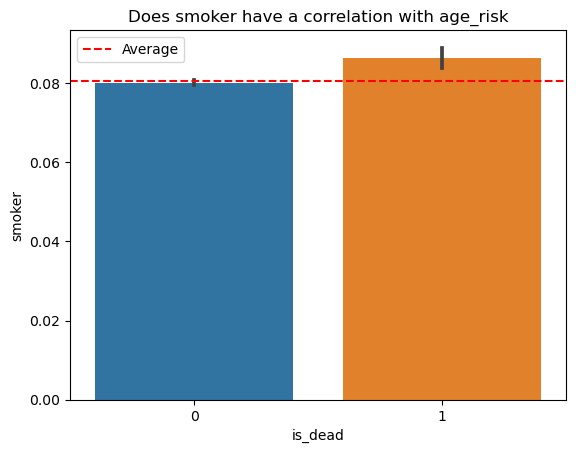

In [30]:
create_barplot(train,'is_dead','smoker','Does smoker have a correlation with covid related death')

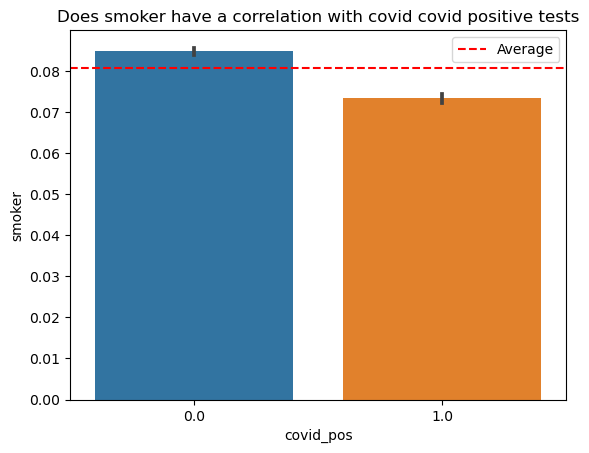

In [32]:
create_barplot(train,'covid_pos','smoker','Does smoker have a correlation with covid covid positive tests')

<AxesSubplot:xlabel='is_dead', ylabel='count'>

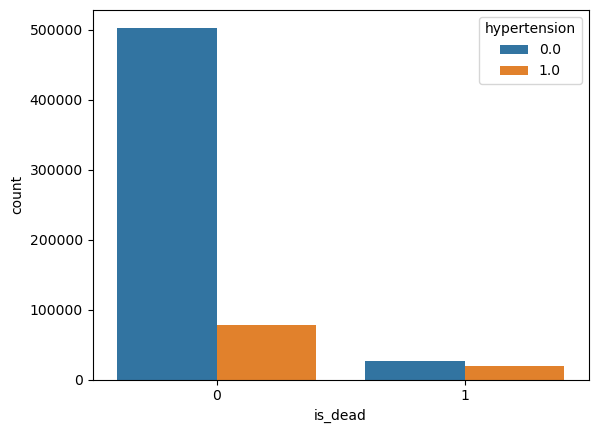

In [49]:
sns.countplot(x='is_dead', hue='hypertension', data=train)

<AxesSubplot:xlabel='covid_pos', ylabel='count'>

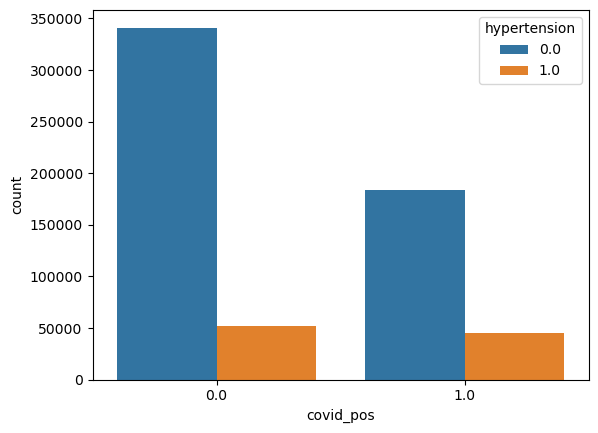

In [48]:
sns.countplot(x='covid_pos', hue='hypertension', data=train)

<AxesSubplot:xlabel='is_dead', ylabel='count'>

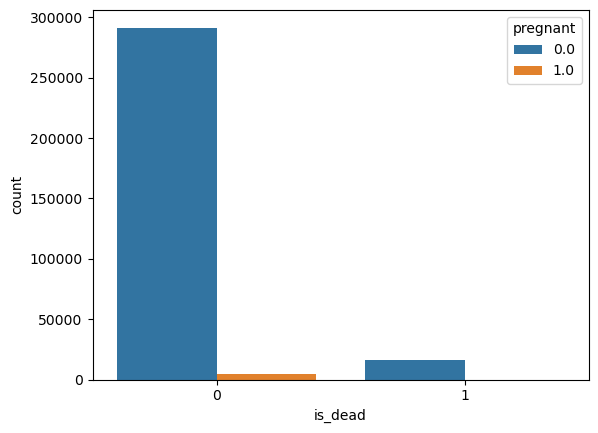

In [46]:
sns.countplot(x='is_dead', hue='pregnant', data=train)

<AxesSubplot:xlabel='covid_pos', ylabel='count'>

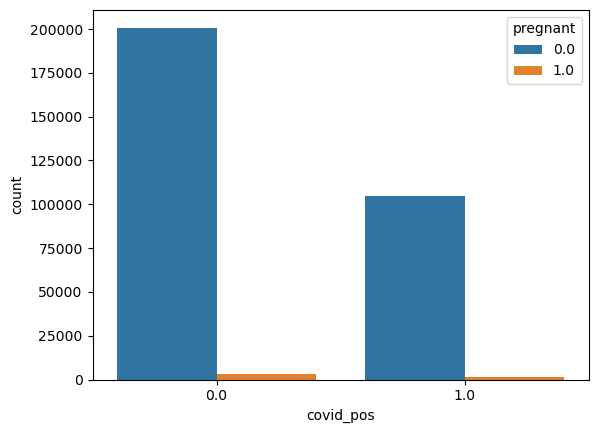

In [45]:
sns.countplot(x='covid_pos', hue='pregnant', data=train)

<AxesSubplot:xlabel='is_dead', ylabel='count'>

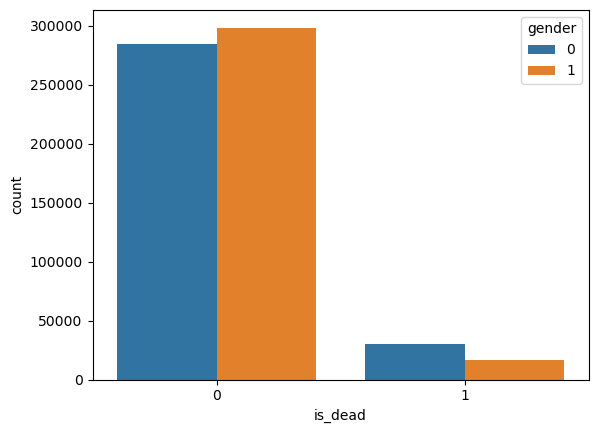

In [44]:
sns.countplot(x='is_dead', hue='gender', data=train)

<AxesSubplot:xlabel='covid_pos', ylabel='count'>

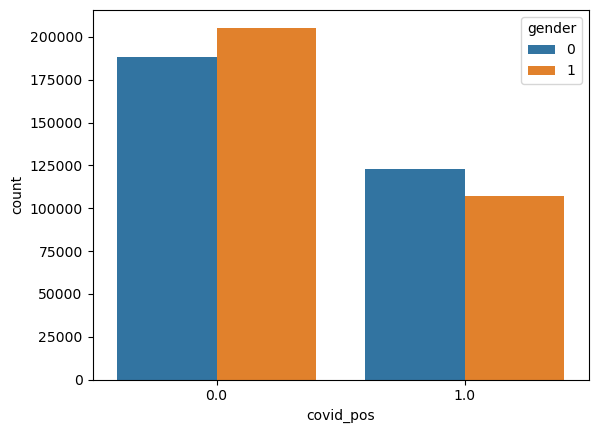

In [43]:
sns.countplot(x='covid_pos', hue='gender', data=train)

In [50]:
def categorical_variables(df, x_col, hue_col):
    # Plotting using Seaborn
    ax = sns.countplot(x=x_col, hue=hue_col, data=df)

    # Calculate average count
    avg_count = df.groupby([x_col, hue_col]).size().mean()

    # Add average count line
    ax.axhline(y=avg_count, color='r', linestyle='--', label='Average Count')

    # Set labels and title
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title('Counts of Variables by ' + x_col)

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


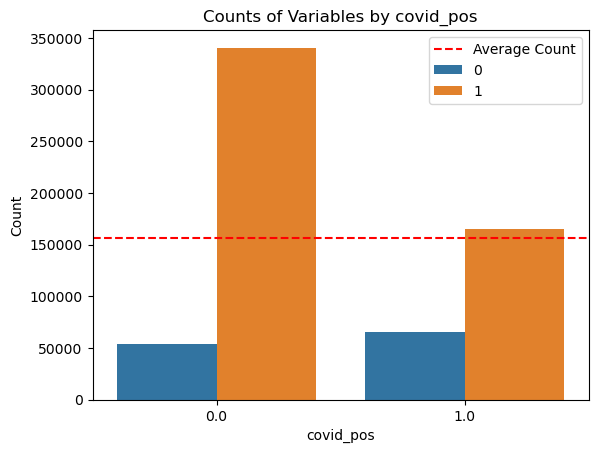

In [51]:
categorical_variables(train,'covid_pos','is_hospitalized')